0.498
0.896
1.0
0.998
0.998
0.998
0.996
0.996
0.996
0.996
0.996
0.996
0.996
0.996
0.996
0.996
0.996
0.996
0.996
0.996


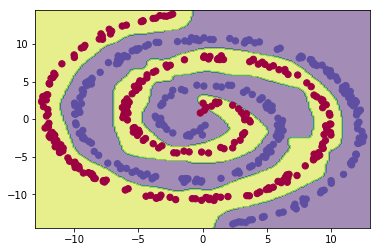

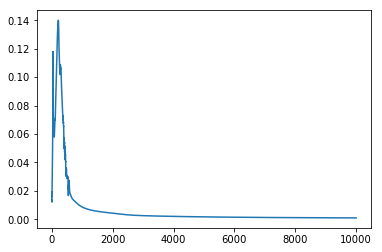

Accuracy from scratch:  0.996
Accuracy from trained model:  0.996


In [2]:
# # USI - Università della svizzera italiana
#
# Machine Learning - Fall 2017
#
# Assignment 1: Neural Networks
# Code Skeleton

import numpy as np
import matplotlib.pyplot as plt
from math import exp
import math

# Part 1


def get_part1_data():
    """
    Returns the toy data for the first part.
    """
    X = np.array([[1, 8], [6, 2], [3, 6], [4, 4], [3, 1], [1, 6],
                  [6, 10], [7, 7], [6, 11], [10, 5], [4, 11]])
    
    T = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1]).reshape(-1, 1)
    return X, T


def MSE(prediction, target):
    """
    Computes the Mean Squared Error of a prediction and its target
    """
    y = prediction
    t = target
    n = prediction.size

    # Implement

    meanCost = np.sum((t - y)**2) / (2 * len(y))
    #meanCost = np.sum((target - y)**2) / 2

    # End
    return meanCost


def dMSE(prediction, target):
    """
    Computes the derivative of the Mean Squared Error function.
    """
    y = prediction
    t = target
    n = prediction.size

    # Implement
    error = (y - t)/n
    # End
    return error


class Perceptron:
    """
    Keeps track of the variables of the Perceptron model. Can be used for prediction and to compute the gradients.
    """

    def __init__(self):
        """
        The variables are stored inside a dictonary to make them easy accessible.
        """
        self.var = {
            "W": np.array([[.8], [-.5]]),
            "b": 2
        }

    def forward(self, inputs):
        """
        Implements the forward pass of the perceptron model and returns the prediction y. We need to
        store the current input for the backward function.
        """
        x = self.x = inputs
        W = self.var['W']
        b = self.var['b']

        # Implement

        y = np.dot(x, W) + b

        # End
        return y

    def backward(self, error):
        """
        Backpropagates through the model and computes the derivatives. The forward function must be
        run before hand for self.x to be defined. Returns the derivatives without applying them using
        a dictonary similar to self.var.
        """
        x = self.x

        # Implement
        dW = np.dot(np.transpose(x), error)
        db = 1

        # End
        updates = {"W": dW,
                  "b": db}
        return updates


def train_one_step(model, learning_rate, inputs, targets):
    """
    Uses the forward and backward function of a model to compute the error and updates the model
    weights while overwritting model.var. Returns the cost.
    """

    # Implement
    y = model.forward(inputs)
    cost = MSE(y, targets)
    error = dMSE(y, targets)
    updates = model.backward(error)
    for varstr, grad in updates.items():
        model.var[varstr] = model.var[varstr] - (learning_rate * updates[varstr])
    # End

    return cost


def plot_data(X, T):
    """
    Plots the 2D data as a scatterplot
    """
    plt.scatter(X[:, 0], X[:, 1], s=40, c=T, cmap=plt.cm.Spectral)

    
def plot_boundary(model, X, targets, threshold=0.0):
    """
    Plots the data and the boundary lane which seperates the input space into two classes.
    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    y = model.forward(X_grid)
    plt.contourf(xx, yy, y.reshape(*xx.shape) < threshold, alpha=0.5)
    plot_data(X, targets)
    plt.ylim([y_min, y_max])
    plt.xlim([x_min, x_max])
    plt.show()

def plot_boundary_softmax(model, X, targets, threshold=0.0):
    """
    Plots the data and the boundary lane which seperates the input space into two classes.
    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    y = model.forward(X_grid)
    y = one_hot_reverse(y)
    targets = one_hot_reverse(targets)
    plt.contourf(xx, yy, y.reshape(*xx.shape) < threshold, alpha=0.5)
    plot_data(X, targets)
    plt.ylim([y_min, y_max])
    plt.xlim([x_min, x_max])
    plt.show()

def run_part1():
    """
    Train the perceptron according to the assignment.
    """
    X, T = get_part1_data()
    model = Perceptron()
    costs = []
    for i in range(0, 14):
        costs.append(train_one_step(model, 0.02, X, T))

    plot_boundary(model, X, T)


# Part 2
def twospirals(n_points=120, noise=1.6, twist=420):
    """
     Returns a two spirals dataset.
    """
    #np.random.seed(0)
    n = np.sqrt(np.random.rand(n_points, 1)) * twist * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    X, T = (np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
            np.hstack((np.zeros(n_points), np.ones(n_points))))
    T = np.reshape(T, (T.shape[0], 1))
    return X, T

def compute_accuracy(model, X, T):
    return float(np.mean(((model.forward(X) > 0.5) * 1 == T) * 1))
    
def compute_accuracy_softmax(model, X, T):
    """
    Computes the average accuracy over this data.
    """
    prediction = model.forward(X)
    prediction = one_hot_reverse(prediction)
    T = one_hot_reverse(T)
    return np.mean(((prediction > 0.5) * 1 == T) * 1)


def sigmoid(x):
    """
    Implements the sigmoid activation function.
    """
    # Implement
    x = 1 / (1 + np.exp(-x))
    # End
    return x


def dsigmoid(x):
    """
    Implements the derivative of the sigmoid activation function.
    """
    sig = sigmoid(x)
    # Implement
    x = (sig) * (1 - sig)
    # End
    return x


def tanh(x):
    """
    Implements the hyperbolic tangent activation function.
    """
    # Implement
    x = np.tanh(x)
    # End
    return x


def dtanh(x):
    """
    Implements the derivative of the hyperbolic tangent activation function.
    """
    # Implement
    x = 1 - np.tanh(x)**2
    # End
    return x

#https://arxiv.org/pdf/1710.05941.pdf
def swish(x):
    x = x * sigmoid(x)
    return x
    
def dswish(x):
    x = sigmoid(x) + x * dsigmoid(x)
    return x

def softmax(x):
    #act = np.exp(x)
    #x = act / act.sum()
    act = np.exp(x)
    probs = act / np.sum(act, axis=1,keepdims=True)
    return probs

def neg_log_likelihood(prediction, target):
    x = -np.dot(target,np.transpose(np.log(prediction))).mean()
    return x

def delta_neg_log_likelihood(prediction,target):
    return prediction - target

    
    



class NeuralNetwork:
    """
    Keeps track of the variables of the Multi Layer Perceptron model. Can be
    used for prediction and to compute the gradients.
    """

    def __init__(self):
        """
        The variables are stored inside a dictonary to make them easy accessible.
        """
        # Implement
        W1_in = np.random.randn(2, 20)*(1/math.sqrt(2))
        #W1_in = np.random.randint(1,11,[2,20])
        # W1_out =
        W2_in = np.random.randn(20, 15)*(1/math.sqrt(20))
        #W2_in = np.random.randint(1,11,[20,15])
        #W2_out = ...
        W3_in = np.random.randn(15, 1)*(1/math.sqrt(15))
        #W3_in = np.random.randint(1,11,[15,1])
        #W3_out = ...

        self.var = {
            "W1": W1_in,
            "b1": np.zeros(20),
            "W2": W2_in,
            "b2": np.zeros(15),
            "W3": W3_in,
            "b3": np.zeros(1)
        }
        self.memo = {}
        self.updates = {}

        # End

    def forward(self, inputs):
        """
        Implements the forward pass of the MLP model and returns the prediction y. We need to
        store the current input for the backward function.
        """
        x = self.x = inputs

        W1 = self.var['W1']
        b1 = self.var['b1']
        W2 = self.var['W2']
        b2 = self.var['b2']
        W3 = self.var['W3']
        b3 = self.var['b3']

        # Implement
        z1 = np.dot(x, W1) + b1
        a2 = tanh(z1)
        z2 = np.dot(a2, W2) + b2
        a3 = tanh(z2)
        z3 = np.dot(a3, W3) + b3
        y = sigmoid(z3)

        self.memo['z1'] = z1
        self.memo['a2'] = a2
        self.memo['z2'] = z2
        self.memo['a3'] = a3
        self.memo['z3'] = z3
        self.memo['y'] = y
        # End
        return y

    def backward(self, error):
        """
        Backpropagates through the model and computes the derivatives. The forward function must be
        run before hand for self.x to be defined. Returns the derivatives without applying them using
        a dictonary similar to self.var.
        """
        x = self.x
        W1 = self.var['W1']
        b1 = self.var['b1']
        W2 = self.var['W2']
        b2 = self.var['b2']
        W3 = self.var['W3']
        b3 = self.var['b3']

        # Implement
        z1 = self.memo['z1']
        a2 = self.memo['a2']
        z2 = self.memo['z2']
        a3 = self.memo['a3']
        z3 = self.memo['z3']
        
        deltaL1 = error*dsigmoid(z3)
        deltaL2 = np.dot(deltaL1, np.transpose(W3)) * dtanh(z2)
        deltaL3 = np.dot(deltaL2, np.transpose(W2)) * dtanh(z1)
        
        dW1 = np.dot(np.transpose(x), deltaL3)
        db1 = np.sum(deltaL3)
        dW2 = np.dot(np.transpose(a2), deltaL2)
        db2 = np.sum(deltaL2)
        dW3 = np.dot(np.transpose(a3), deltaL1)
        db3 = np.sum(deltaL1)

        # End
        updates = {"W1": dW1,
                   "b1": db1,
                   "W2": dW2,
                   "b2": db2,
                   "W3": dW3,
                   "b3": db3}
        return updates


def gradient_check():
    """
    Computes the gradient numerically and analitically and compares them.
    """
    X, T = twospirals(n_points=10)
    NN = Perceptron()
    eps = 0.0001

    for key, value in NN.var.items():
        row = np.random.randint(0, NN.var[key].shape[0])
        col = np.random.randint(0, NN.var[key].shape[1])
        print("Checking ", key, " at ", row, ",", col)

    # Implement
        y = NN.forward(X)
        cost = MSE(y, T)
        error = dMSE(y, T)
        updates = NN.backward(error)
        analytic_grad = updates[key][row][col]

        y = NN.forward(X)
        x1 = MSE(y, T)
        NN.var[key][row][col] += 2*eps
        y = NN.forward(X)
        x2 = MSE(y, T)

        # End
        numeric_grad = (x2 - x1) / (2*eps)
        print("numeric grad: ", numeric_grad)
        print("analytic grad: ", analytic_grad)
        if abs(numeric_grad - analytic_grad) < 0.00001:
            print("[OK]")
        else:
            print("[FAIL]")
            


def run_part2():
    """
    Train the multi layer perceptron according to the assignment.
    """

    X, T = twospirals()
    X_training, X_test = X[:192, :], X[192:, :]
    T_training, T_test = T[:192, :], T[192:, :]
    model = NeuralNetwork()
    costs = []
    for i in range(0, 100000):
        costs.append(train_one_step(model, 0.1, X_training, T_training))
        if i % 5000 == 0:
            print(costs[i])
            print(compute_accuracy(model, X_test, T_test))
    
    plot_boundary(model, X_test, T_test,threshold=0.5)
    plt.plot(costs)
    plt.show()
    # End

    return costs


def train_one_step_softmax(model, learning_rate, inputs, targets):
    """
    Uses the forward and backward function of a model to compute the error and updates the model
    weights while overwritting model.var. Returns the cost.
    """

    # Implement
    y = model.forward(inputs)
    cost = neg_log_likelihood(y, targets)
    error = delta_neg_log_likelihood(y, targets)
    updates = model.backward(error)
    for varstr, grad in updates.items():
        model.var[varstr] = model.var[varstr] - (learning_rate * updates[varstr])
    # End

    return cost


def one_hot_encoding(data, num_targets):
    n = len(data)
    target_data = np.zeros([len(data),num_targets])
    for i in range(0,len(data)):
        if data[i] == 0:
            target_data[i][0] = 1
        else:
            target_data[i][1] = 1
    return target_data

def one_hot_reverse(data):
    return data.argmax(1)  

# Part 3
class BetterNeuralNetwork:
    """
    Keeps track of the variables of the Multi Layer Perceptron model. Can be
    used for predictoin and to compute the gradients.
    """

    def __init__(self):
        """
        The variables are stored inside a dictonary to make them easy accessible.
        """
         # Implement
        W1_in = np.random.randn(2, 20)*(1/math.sqrt(2/2))
        #W1_in = np.random.randint(1,11,[2,20])
        # W1_out =
        W2_in = np.random.randn(20, 15)*(1/math.sqrt(20/2))
        #W2_in = np.random.randint(1,11,[20,15])
        #W2_out = ...
        W3_in = np.random.randn(15, 2)*(1/math.sqrt(15/2))
        #W3_in = np.random.randint(1,11,[15,1])
        #W3_out = ...

        self.var = {
            "W1": W1_in,
            "b1": np.zeros(20),
            "W2": W2_in,
            "b2": np.zeros(15),
            "W3": W3_in,
            "b3": np.zeros(2)
        }
        self.memo = {}
        self.updates = {}
        # End

    def forward(self, inputs):
        """
        Implements the forward pass of the MLP model and returns the prediction y. We need to
        store the current input for the backward function.
        """
        x = self.x = inputs

        W1 = self.var['W1']
        b1 = self.var['b1']
        W2 = self.var['W2']
        b2 = self.var['b2']
        W3 = self.var['W3']
        b3 = self.var['b3']

        # Implement
        #print(b1)
        z1 = np.dot(x, W1) + b1
        a2 = swish(z1)
        z2 = np.dot(a2, W2) + b2
        a3 = swish(z2)
        z3 = np.dot(a3, W3) + b3
        y = sigmoid(z3)

        self.memo['z1'] = z1
        self.memo['a2'] = a2
        self.memo['z2'] = z2
        self.memo['a3'] = a3
        self.memo['z3'] = z3
        self.memo['y'] = y
        # End
        #print(y)
        return y

    def backward(self, error):
        """
        Backpropagates through the model and computes the derivatives. The forward function must be
        run before hand for self.x to be defined. Returns the derivatives without applying them using
        a dictonary similar to self.var.
        """
        x = self.x
        W1 = self.var['W1']
        b1 = self.var['b1']
        W2 = self.var['W2']
        b2 = self.var['b2']
        W3 = self.var['W3']
        b3 = self.var['b3']

        # Implement

        # Implement
        z1 = self.memo['z1']
        a2 = self.memo['a2']
        z2 = self.memo['z2']
        a3 = self.memo['a3']
        z3 = self.memo['z3']
        
        #print(error.shape)
        deltaL1 = error*dsigmoid(z3)
        #print(error.shape, dsigmoid(z3).shape, deltaL1.shape, np.transpose(W3).shape)
        #print(deltaL1.shape, W3.shape)
        deltaL2 = np.dot(deltaL1, np.transpose(W3)) * dswish(z2)
        #deltaL2 = np.dot(W3, deltaL1) * dtanh(z2)
        #print(dtanh(z2).shape, deltaL2.shape, np.transpose(W2).shape)
        #print(deltaL2)
        deltaL3 = np.dot(deltaL2, np.transpose(W2)) * dswish(z1)
        #deltaL3 = np.dot(W2, deltaL2) * dtanh(z1)
        #print(deltaL3.shape, dtanh(z1).shape)
        
        #print(np.transpose(x).shape, deltaL3.shape)
        dW1 = np.dot(np.transpose(x), deltaL3)
        db1 = np.sum(deltaL3)
        dW2 = np.dot(np.transpose(a2), deltaL2)
        db2 = np.sum(deltaL2)
        dW3 = np.dot(np.transpose(a3), deltaL1)
        db3 = np.sum(deltaL1)
        #print(deltaL1.shape, deltaL2.shape, deltaL3.shape)
        #print(dW1.shape, dW2.shape, dW3.shape)
        #print(W1.shape, W2.shape,W3.shape)
        #print(a3.shape, z2.shape)
        #print(x.shape)

        # End
        updates = {"W1": dW1,
                   "b1": db1,
                   "W2": dW2,
                   "b2": db2,
                   "W3": dW3,
                   "b3": db3}
        return updates

        
def competition_train_from_scratch(testX, testT):
    """
    Trains the BetterNeuralNet model from scratch using the twospirals data and calls the other
    competition funciton to check the accuracy.
    """
    trainX, trainT = twospirals(n_points=250, noise=0.6, twist=800)
    trainT = one_hot_encoding(trainT, 2)
    testT = one_hot_encoding(testT, 2)
    model = BetterNeuralNetwork()

    #print(T_training)
    batch_size = 10
    costs = []
    for i in range(0, 10000):
        for j in range(10, len(trainX),batch_size):
            cost = train_one_step_softmax(model, 0.01, trainX[(j-batch_size):j], trainT[(j-batch_size):j])
        costs.append(cost)
        if i % 500 == 0:
            #print(costs[i])
            print(compute_accuracy_softmax(model, testX, testT))
    
    #testT = one_hot_reverse(testT)
    plot_boundary_softmax(model, testX, testT,threshold=0.5)
    plt.plot(costs)
    plt.show()
    np.save('my_weights.npy', model.var) 
    # Implement

    # End

    print("Accuracy from scratch: ", compute_accuracy_softmax(model, testX, testT))


def competition_load_weights_and_evaluate_X_and_T(testX, testT):
    """
    Loads the weight values from a file into the BetterNeuralNetwork class and computes the accuracy.
    """
    NN = BetterNeuralNetwork()
    testT = one_hot_encoding(testT, 2)
    # Implement
    read_dictionary = np.load('my_weights.npy').item()
    NN.var = read_dictionary
    #print(NN.var)
    #print(read_dictionary)
    # End

    print("Accuracy from trained model: ", compute_accuracy_softmax(NN, testX, testT))


if __name__ == '__main__':
    #run_part1()
    #run_part2()
    #gradient_check()
    testX, testT = twospirals(n_points=250, noise=0.6, twist=800)
    competition_train_from_scratch(testX, testT)
    competition_load_weights_and_evaluate_X_and_T(testX, testT)


In [67]:
unison_shuffled_copies(X, T)

NameError: name 'X' is not defined

In [114]:

    
    
    
    
testX, testT = twospirals(n_points=250, noise=1.6, twist=420)
one_hot_encoding(testT, 2)

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,

In [87]:
a = np.zeros([1,2])
b = np.zeros([1,2])
(a==b).all()

True

In [90]:
a = np.array([[0, 1], [2, 3], [4, 5], [6, 7], [9, 8]])
b = np.zeros_like(a)
b[np.arange(len(a)), a.argmax(1)] = 1
a.argmax(1)

array([1, 1, 1, 1, 0])

In [92]:
np.range(len(a))

AttributeError: module 'numpy' has no attribute 'range'